In [1]:
import pandas as pd

In [2]:
columns = ['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
           'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
           'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'other']

In [3]:
train_df = pd.read_csv('data/nsl_kdd/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('data/nsl_kdd/KDDTest+.txt', header=None, names=columns)

In [4]:
train_df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
test_df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


Concatenate the datasets into one large dataframe (we will break them up into train-test splits later on)

In [6]:
df = pd.concat([train_df, test_df])
df.shape

(148517, 43)

# Explore Attributes

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns# for pretty plots

## The Label

The predictor label is attack_type

In [8]:
df.attack_type.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl', 'saint',
       'mscan', 'apache2', 'snmpgetattack', 'processtable', 'httptunnel',
       'ps', 'snmpguess', 'mailbomb', 'named', 'sendmail', 'xterm', 'worm',
       'xlock', 'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

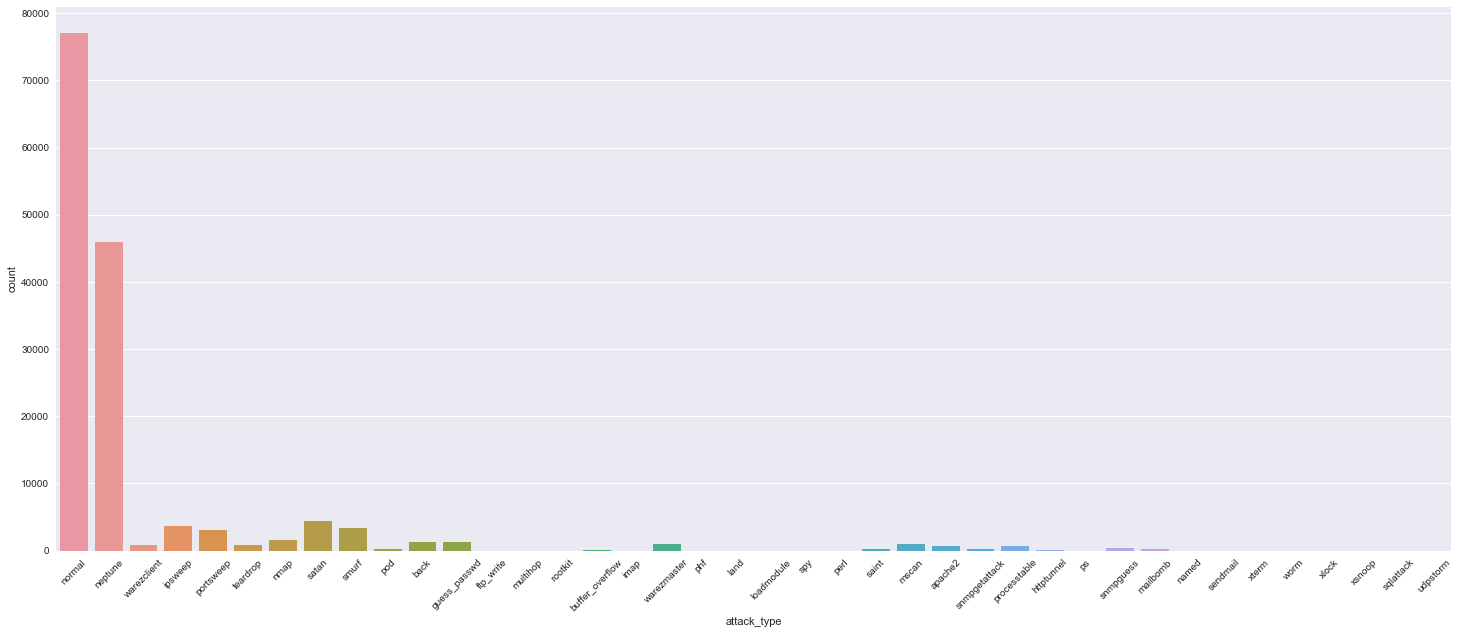

In [9]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="attack_type", data=df)
plt.xticks(rotation=45)

Clearly the data is unevenly distributed.  Let's make a new variable called attack_set to which contains the superset the attack type belongs to

In [10]:
df['attack_set'] = df['attack_type']

In [11]:
# DOS
df.loc[df.attack_set == 'neptune', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'back', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'land', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'pod', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'smurf', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'teardrop', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'mailbomb', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'processtable', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'udpstorm', 'attack_set'] = 'dos'
df.loc[df.attack_set == 'apache2', 'attack_set'] = 'dos' 
df.loc[df.attack_set == 'worm', 'attack_set'] = 'dos'


# User-to-Root (U2R)
df.loc[df.attack_set == 'buffer_overflow', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'loadmodule', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'perl', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'rootkit', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'sqlattack', 'attack_set'] = 'u2r' 
df.loc[df.attack_set == 'xterm', 'attack_set'] = 'u2r'
df.loc[df.attack_set == 'ps', 'attack_set'] = 'u2r'

# Remote-to-Local (R2L)
df.loc[df.attack_set == 'ftp_write', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'guess_passwd', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'imap', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'multihop', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'phf', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'spy', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'warezclient', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'warezmaster', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'xlock', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'xsnoop', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'snmpgetattack', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'httptunnel', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'snmpguess', 'attack_set'] = 'r2l'
df.loc[df.attack_set == 'sendmail', 'attack_set'] = 'r2l' 
df.loc[df.attack_set == 'named', 'attack_set'] = 'r2l'

# Probe attacks
df.loc[df.attack_set == 'satan', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'ipsweep', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'nmap', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'portsweep', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'saint', 'attack_set'] = 'probe'
df.loc[df.attack_set == 'mscan', 'attack_set'] = 'probe'

In [12]:
df.attack_set.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [13]:
df.attack_type.value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
spy                    2
sqlattack              2
udpstorm               2


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

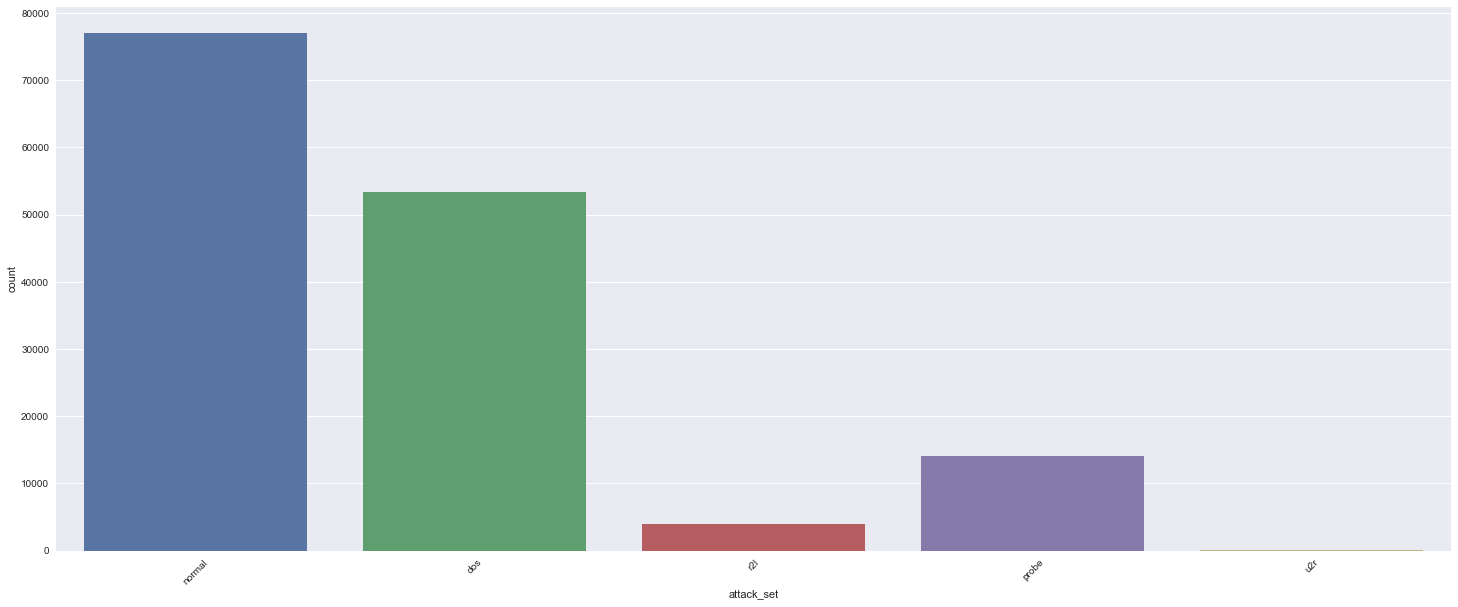

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="attack_set", data=df)
plt.xticks(rotation=45)

In [15]:
df.attack_set.value_counts()

normal    77054
dos       53387
probe     14077
r2l        3880
u2r         119
Name: attack_set, dtype: int64

In [16]:
df.attack_set.describe()

count     148517
unique         5
top       normal
freq       77054
Name: attack_set, dtype: object

In [17]:
y = df[['attack_type', 'attack_set']].copy()
y.head()

,attack_type,attack_set
0,normal,normal
1,normal,normal
2,neptune,dos
3,normal,normal
4,normal,normal


In [18]:
df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other,attack_set
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [19]:
# Let's remove the labels from the dataset now
del df['attack_type']
del df['attack_set']

In [20]:
df.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,other
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


## The Features

In [21]:
df.shape

(148517, 42)

The datset contains 148,517 observations and 42 labels! 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
duration                       148517 non-null int64
protocol                       148517 non-null object
service                        148517 non-null object
flag                           148517 non-null object
src_bytes                      148517 non-null int64
dst_bytes                      148517 non-null int64
land                           148517 non-null int64
wrong_fragment                 148517 non-null int64
urgent                         148517 non-null int64
hot                            148517 non-null int64
num_failed_logins              148517 non-null int64
logged_in                      148517 non-null int64
num_compromised                148517 non-null int64
root_shell                     148517 non-null int64
su_attempted                   148517 non-null int64
num_root                       148517 non-null int64
num_file_creations             148517 n

In [23]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,other
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bce9860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127db4710>]], dtype=object)

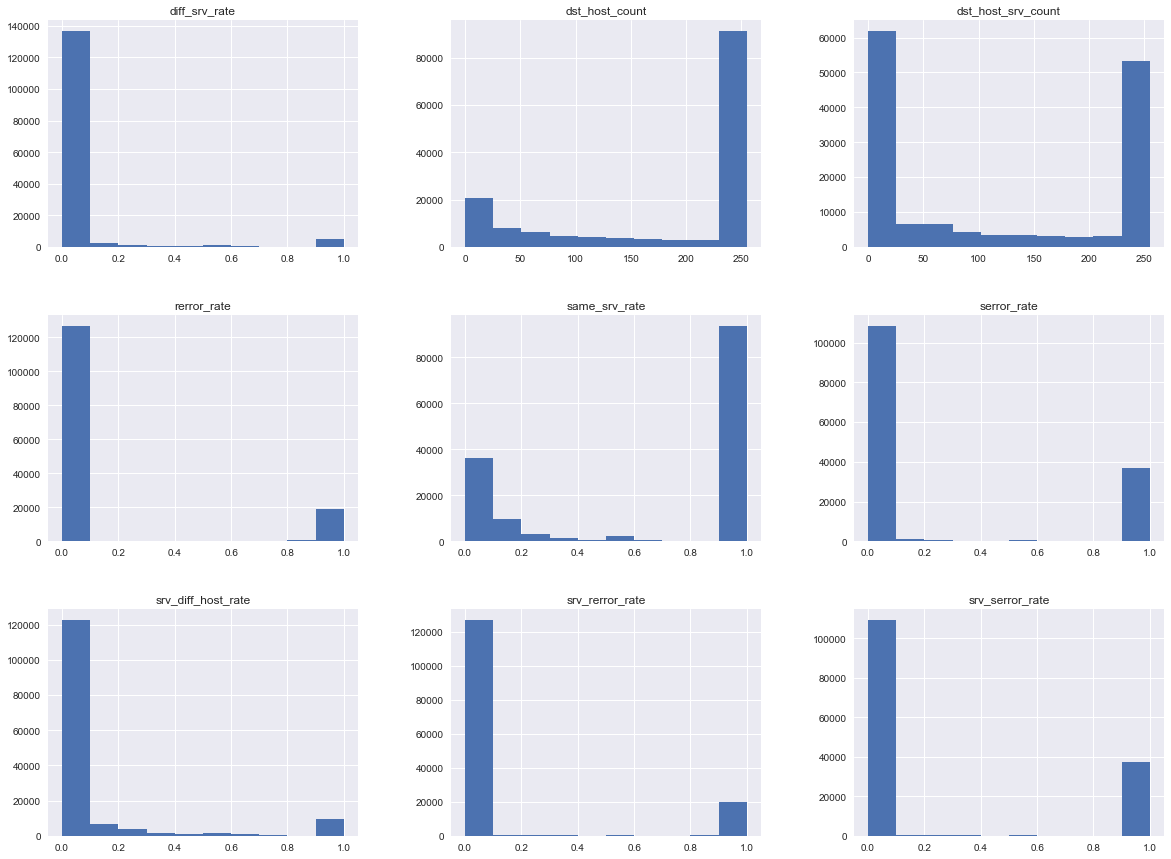

In [44]:
# This is a subset of the numerical features
num_df = df[['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count']]
num_df.hist(figsize=(20,15))

### Categorical Features

In [24]:
df.protocol.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

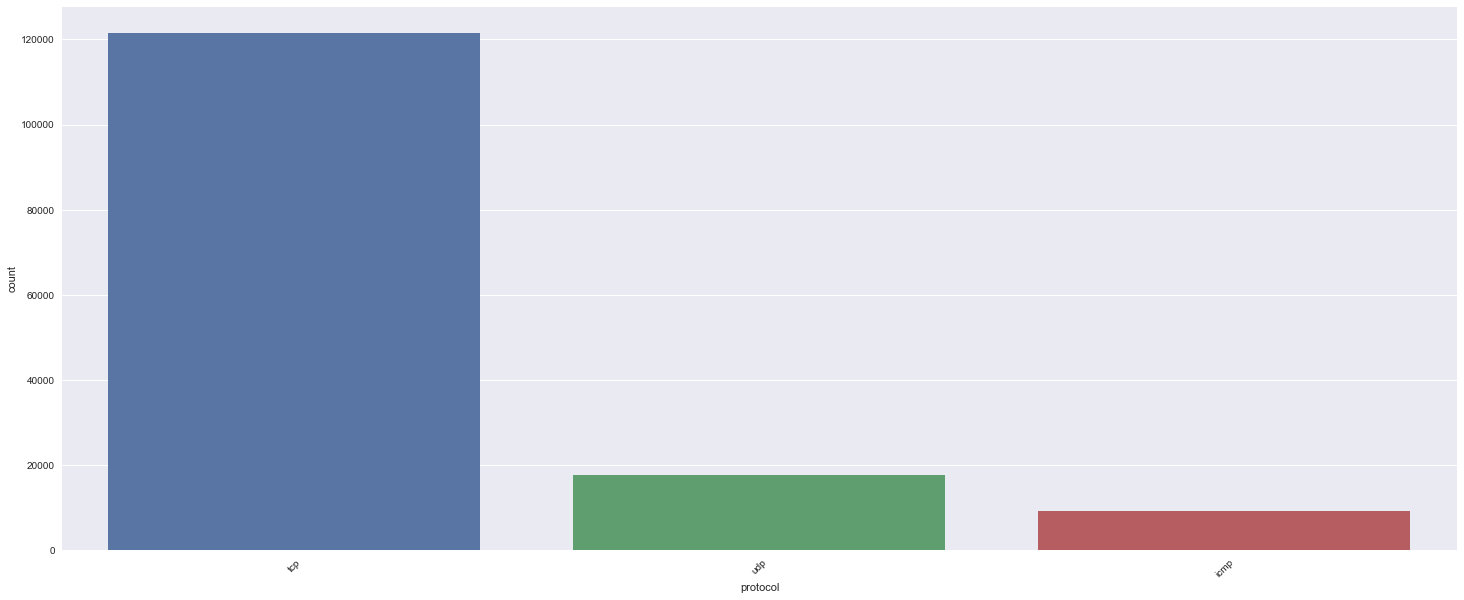

In [25]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="protocol", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

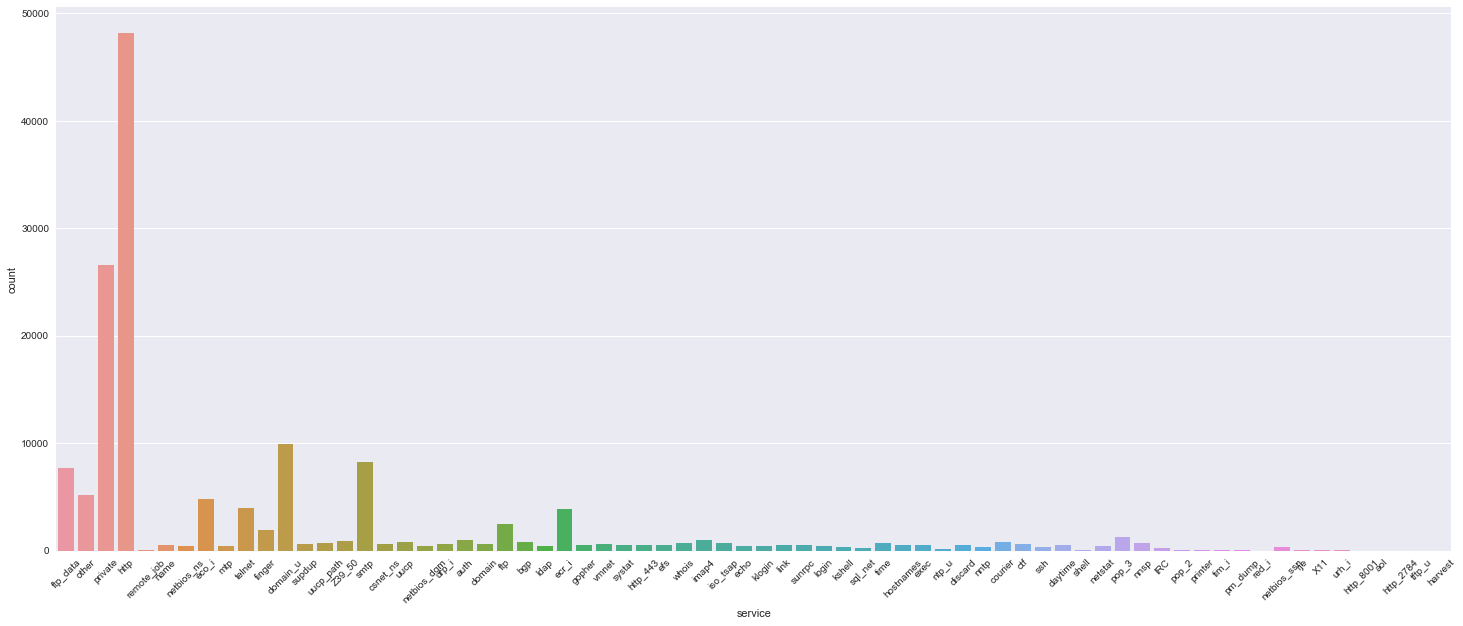

In [26]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="service", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

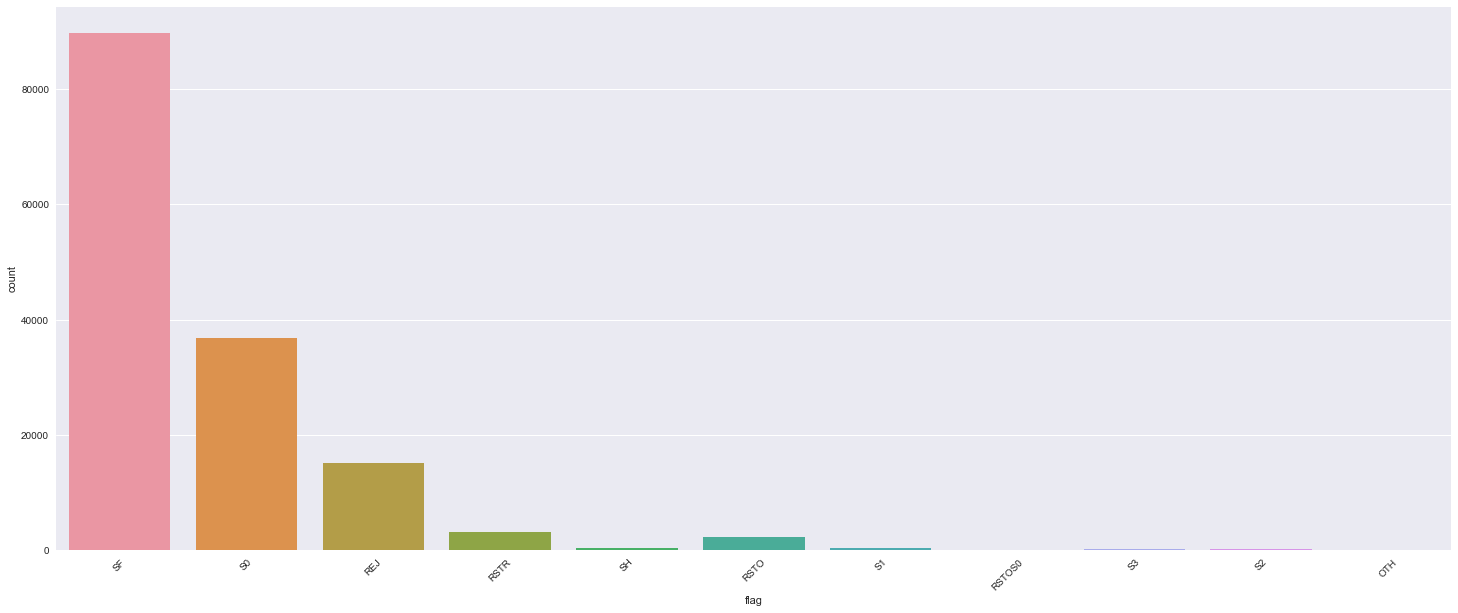

In [27]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="flag", data=df)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

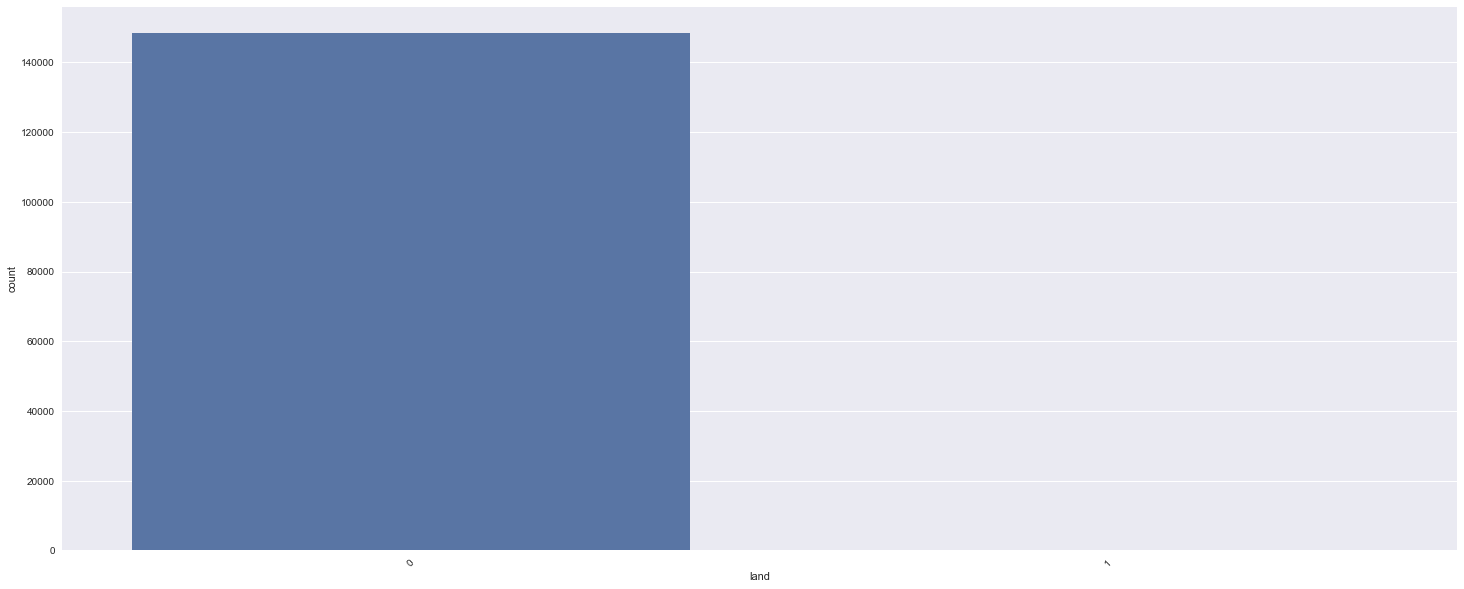

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="land", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

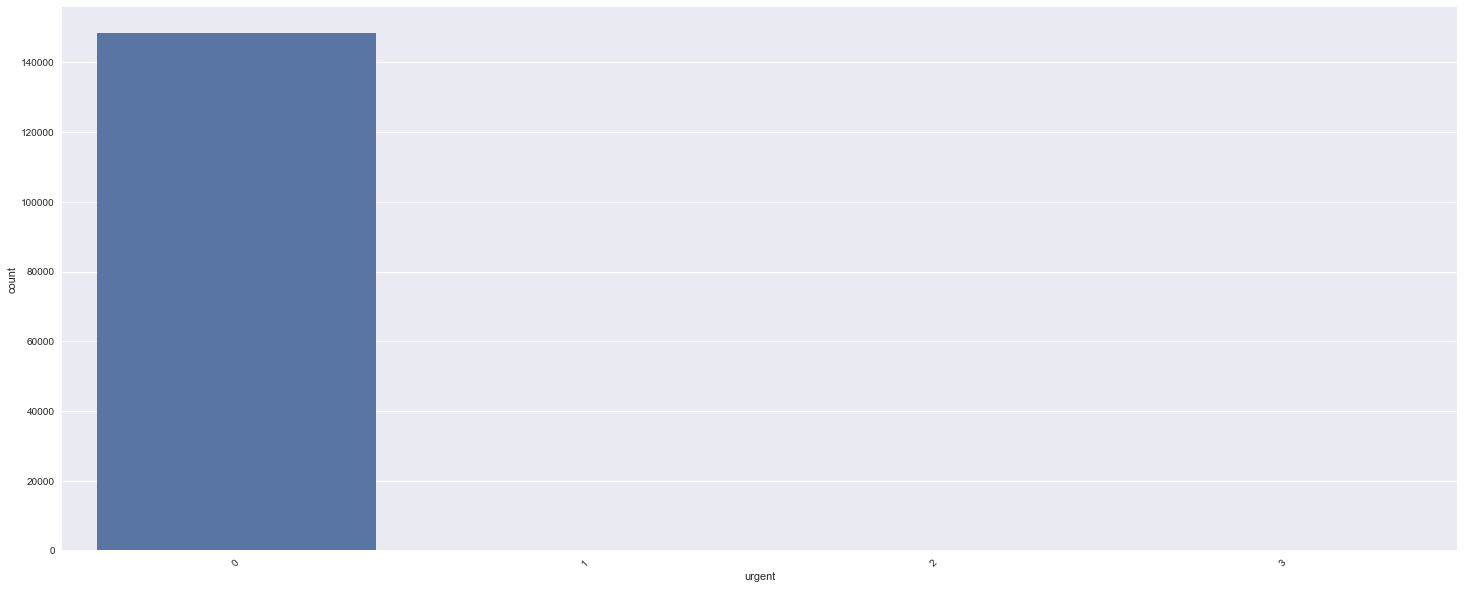

In [29]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="urgent", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

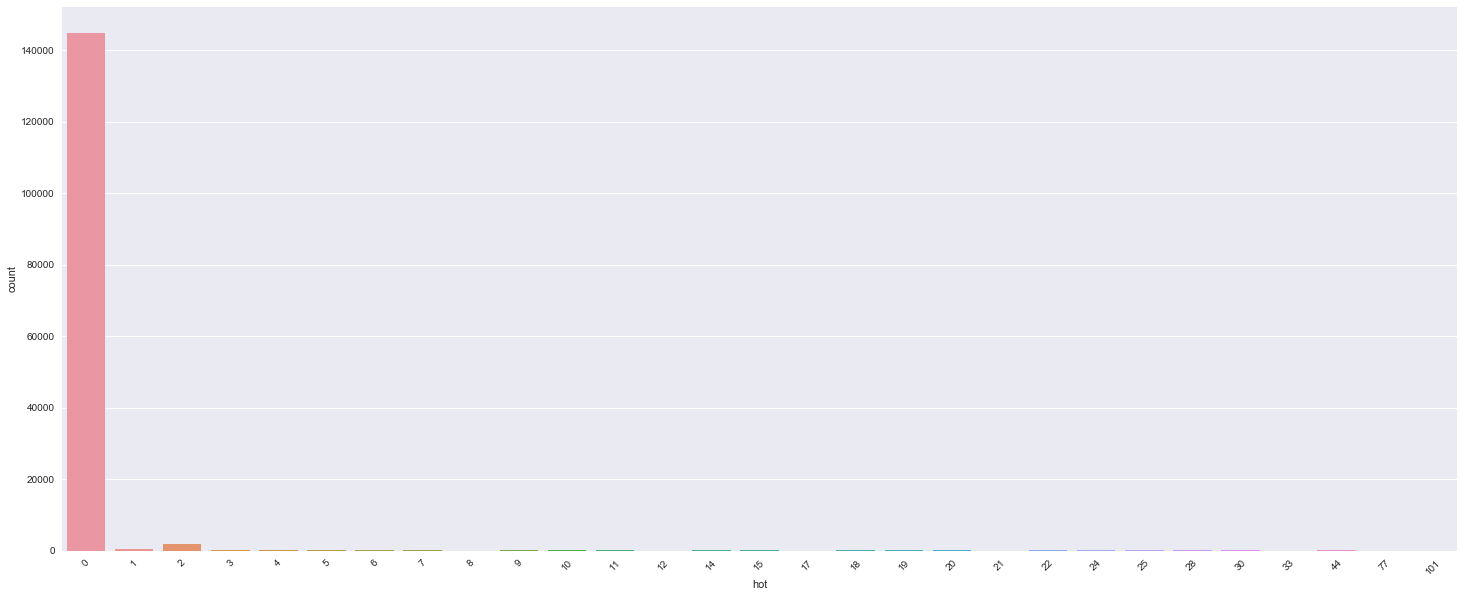

In [30]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="hot", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

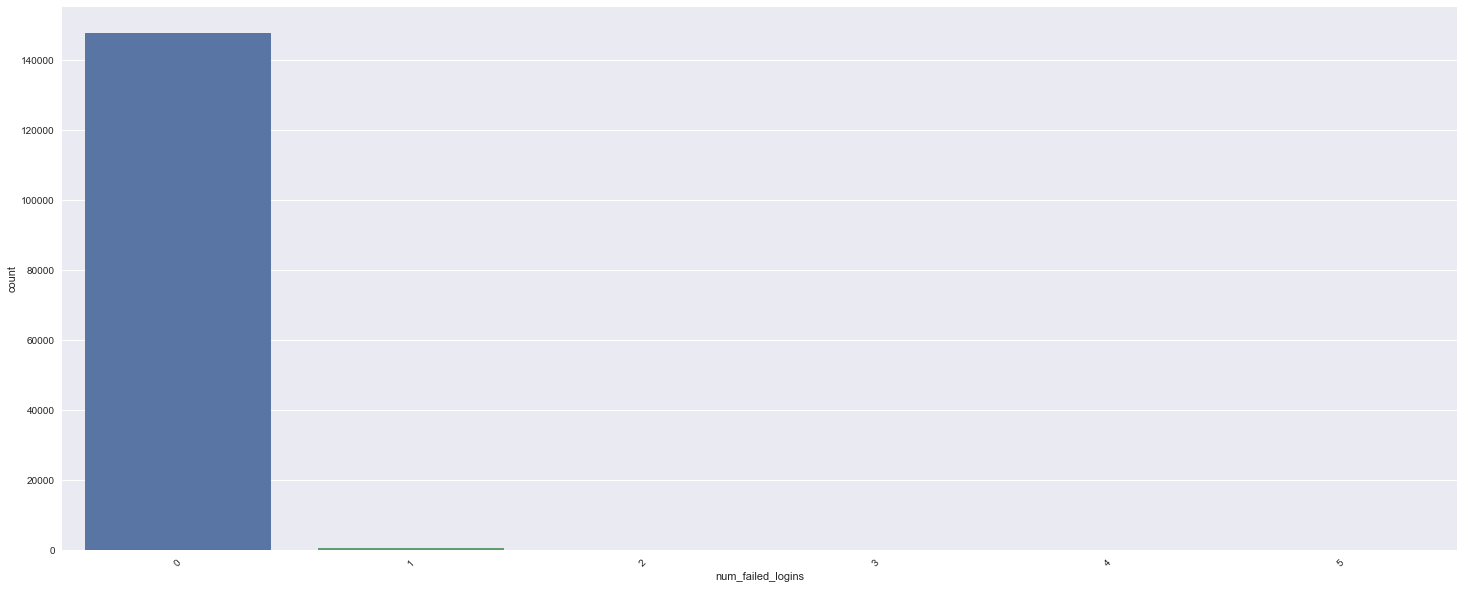

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_failed_logins", data=df)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

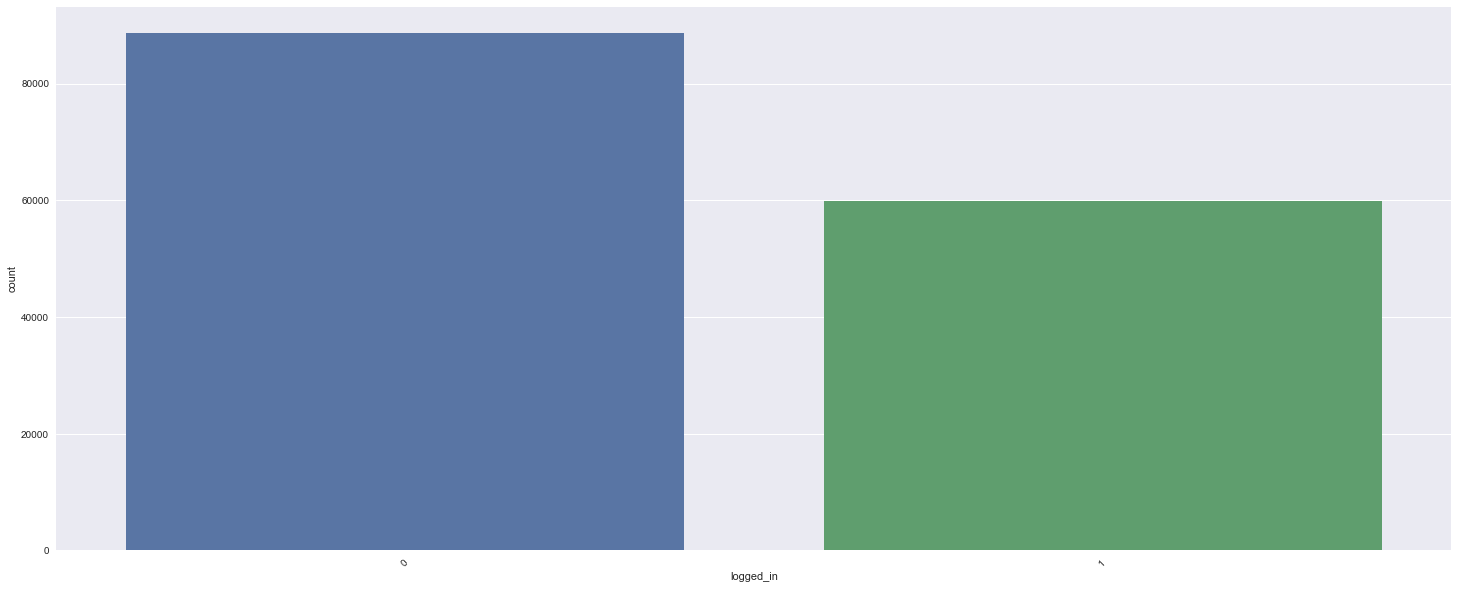

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="logged_in", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

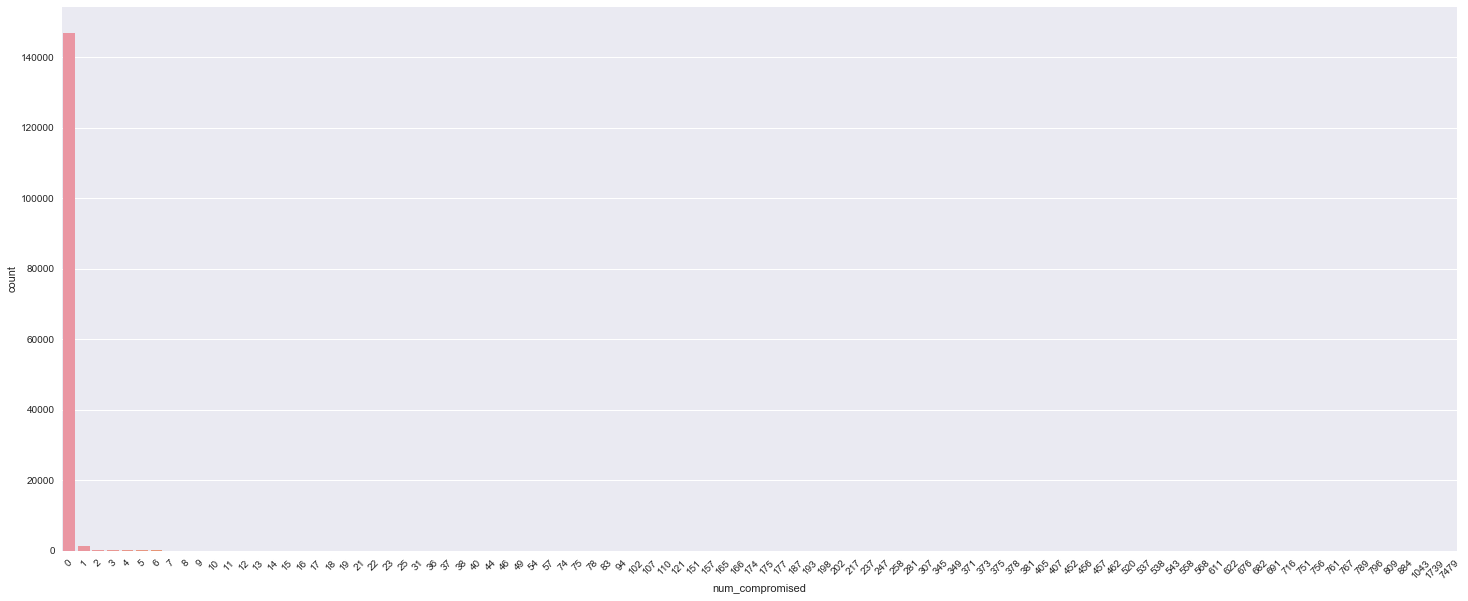

In [33]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_compromised", data=df)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

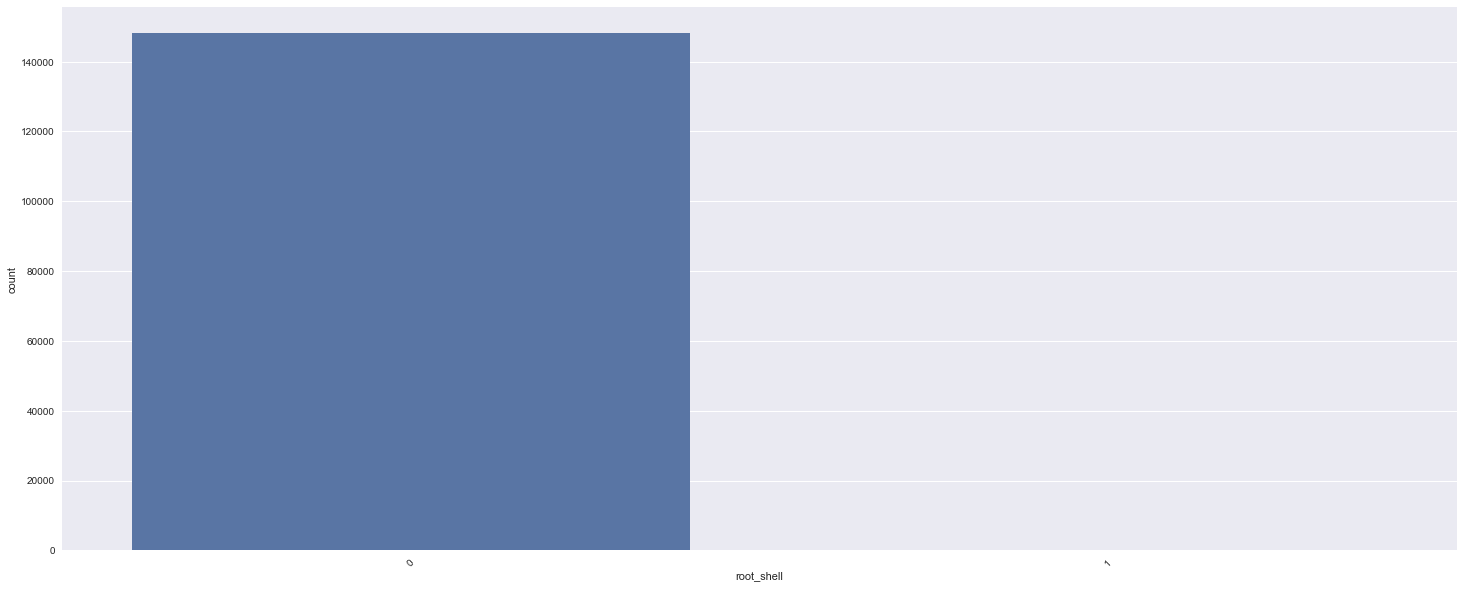

In [34]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="root_shell", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

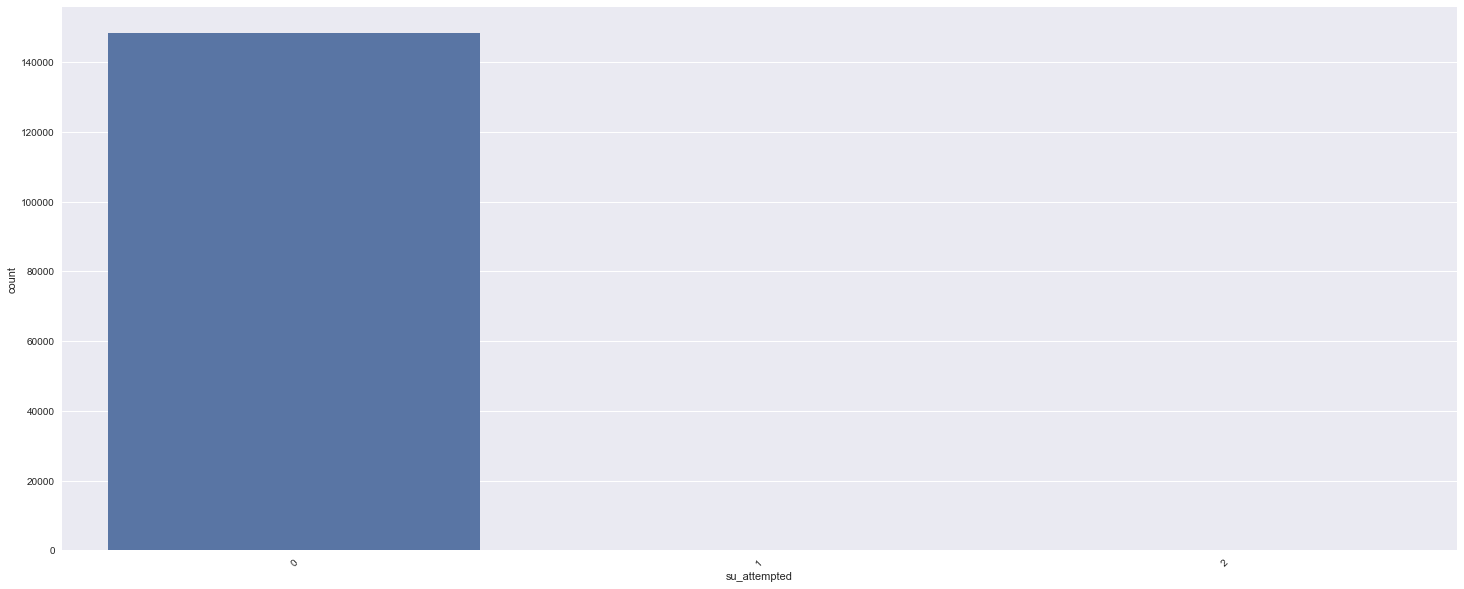

In [35]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="su_attempted", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]), <a list of 91 Text xticklabel objects>)

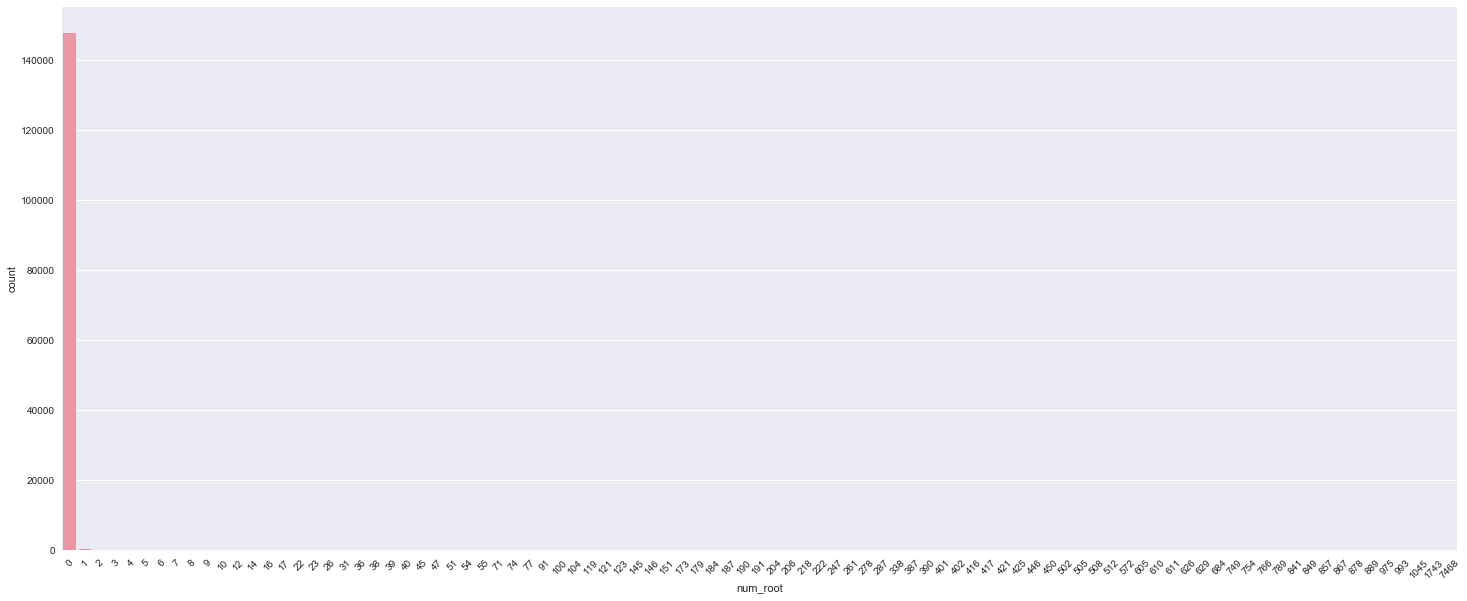

In [36]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="num_root", data=df)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

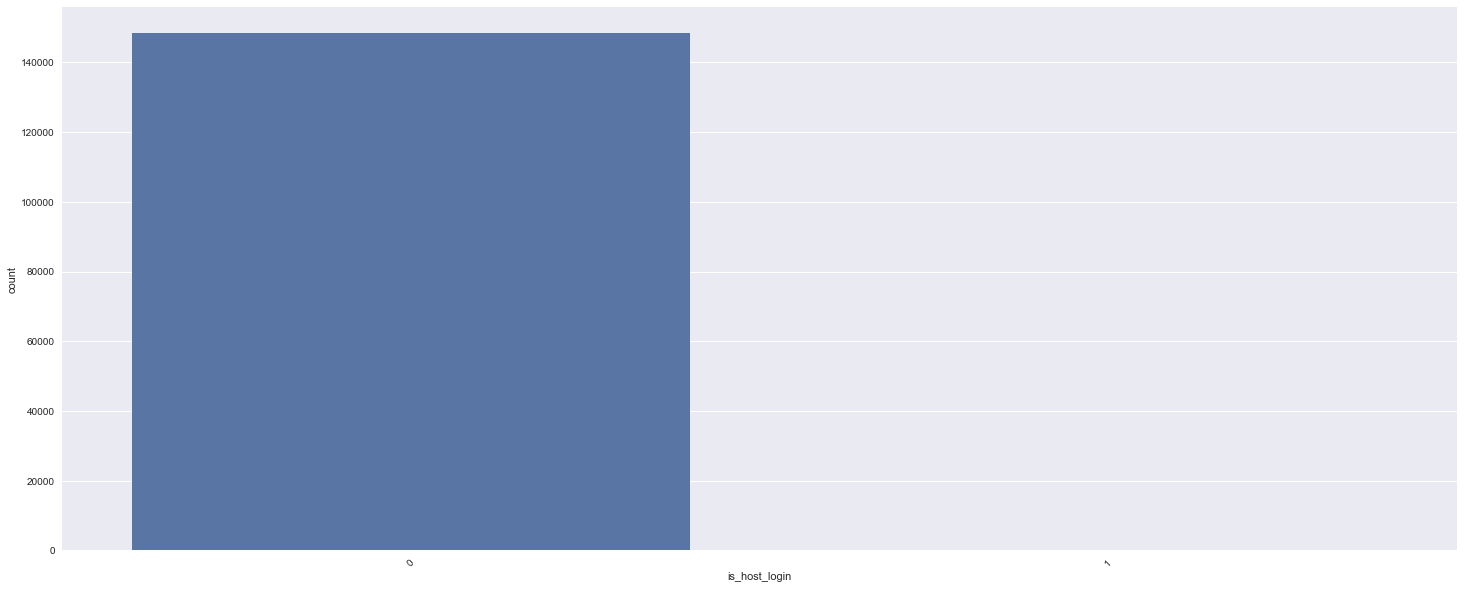

In [37]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="is_host_login", data=df)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

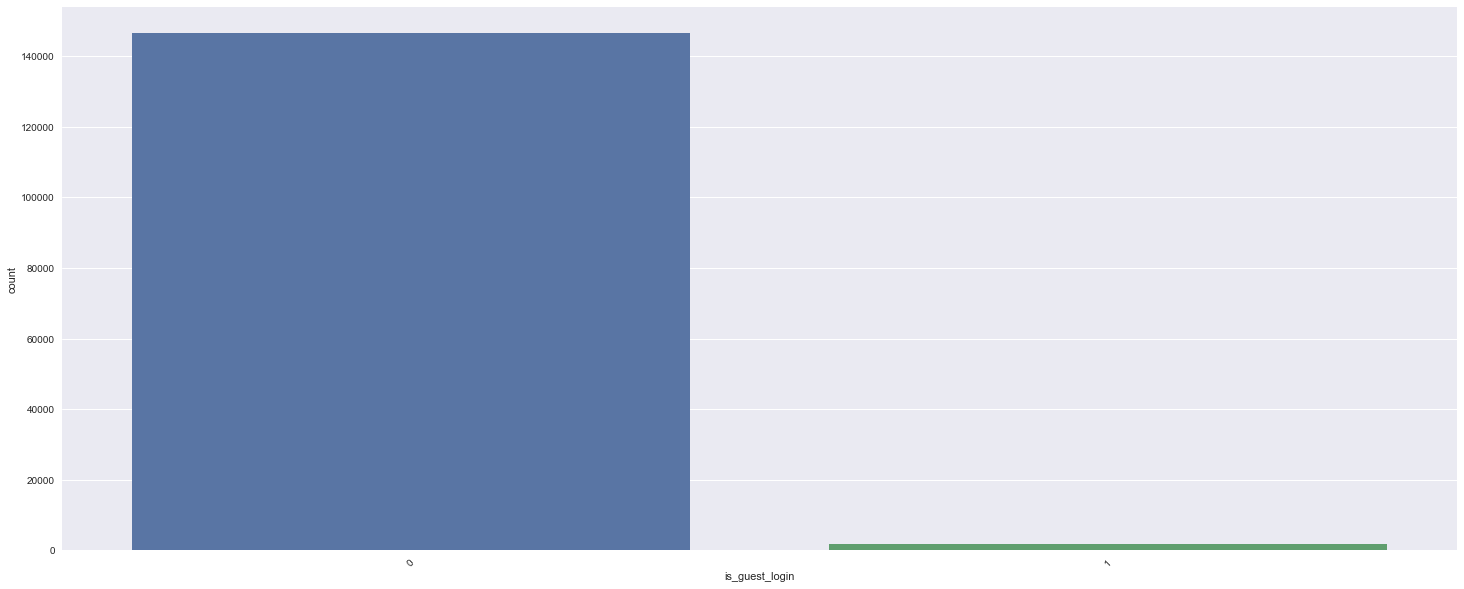

In [38]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(ax=ax, x="is_guest_login", data=df)
plt.xticks(rotation=45)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
duration                       148517 non-null int64
protocol                       148517 non-null object
service                        148517 non-null object
flag                           148517 non-null object
src_bytes                      148517 non-null int64
dst_bytes                      148517 non-null int64
land                           148517 non-null int64
wrong_fragment                 148517 non-null int64
urgent                         148517 non-null int64
hot                            148517 non-null int64
num_failed_logins              148517 non-null int64
logged_in                      148517 non-null int64
num_compromised                148517 non-null int64
root_shell                     148517 non-null int64
su_attempted                   148517 non-null int64
num_root                       148517 non-null int64
num_file_creations             148517 n

In [ ]:
cat_df = df[['protocol', 'service', 'flag']]
cat_df.head()

In [45]:
## Convert Categorical Features to Numbers

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder()  # so ML Classifiers willt treat all values the same